In [1]:
import pandas as pd

### Load data

In [2]:
res_usleep = pd.read_csv('res_usleep.csv', index_col=0)
res_usleep.head()

,rdma1,rdma2,rdma3,tcp1,tcp2,tcp3
0,145,170,131,329,314,251
1,40,42,15,276,298,227
2,38,36,41,237,292,300
3,39,36,37,284,289,183
4,43,40,43,271,314,194


In [3]:
res_no_usleep = pd.read_csv('res_no_usleep.csv', index_col=0)
res_no_usleep.head()

,rdma1,rdma2,rdma3,tcp1,tcp2,tcp3
0,334,574,630,182,173,283
1,342,561,691,172,160,266
2,340,560,710,169,157,263
3,359,584,710,170,159,264
4,360,587,710,171,161,265


In [4]:
res_usleep_350 = pd.read_csv('res_usleep_350.csv', index_col=0)
res_usleep_350.head()

,rdma1,rdma2,rdma3,tcp1,tcp2,tcp3
0,162,157,155,404,388,465
1,43,42,41,309,425,403
2,42,45,44,234,454,389
3,41,38,38,247,463,370
4,49,49,48,240,596,337


In [5]:
res_usleep_700 = pd.read_csv('res_usleep_700.csv', index_col=0)
res_usleep_700.head()

,rdma1,rdma2,rdma3,tcp1,tcp2,tcp3
0,122,NaN,152,413,376,364
1,46,48.0,45,340,312,348
2,39,36.0,38,350,303,401
3,37,36.0,38,344,324,393
4,51,54.0,49,345,333,356


In [6]:
res_usleep_1400 = pd.read_csv('res_usleep_1400.csv', index_col=0)
res_usleep_1400.head()

,rdma1,rdma2,rdma3,tcp1,tcp2,tcp3
0,147,124,176,308,463,443
1,40,48,47,206,411,314
2,48,49,42,200,383,317
3,40,39,36,243,387,302
4,28,52,45,247,386,336


### Helper code

In [67]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

def hist_data(df, title, num=10, ub=None):    
    df['rdma'] = df[['rdma1', 'rdma2', 'rdma3']].mean(axis=1)
    df['tcp'] = df[['tcp1', 'tcp2', 'tcp3']].mean(axis=1)
    # df[['rdma', 'tcp']].plot(kind='bar', color=['blue', 'orange'])

    # # set the title and x label of the plot
    # # plt.title('Bar Chart of Columns A and B')
    # plt.xlabel('Echo time')

    # # show the plot
    # plt.show()
    #fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

    # We can set the number of bins with the *bins* keyword argument.
    #axs[0].hist(df['rdma'])
    #axs[1].hist(df['tcp'])
    if ub is None:
        ub = max(df['rdma'])
        print(ub)
        ub = max(ub, max(df['tcp']))
    bins = np.linspace(0, ub, num)
    pyplot.hist(df['rdma'], bins, alpha=0.5, label='RDMA')
    pyplot.hist(df['tcp'], bins, alpha=0.5, label='TCP')
    pyplot.legend(loc='upper right')
    pyplot.title(title)
    pyplot.show()

def payload_data(df_5, df_350, df_700, df_1400, title, num=10, ub_rdma=None):
    if ub_rdma is None:
        ub_rdma = max(df_5)
        ub_rdma = max(ub_rdma, max(df_350))
        ub_rdma = max(ub_rdma, max(df_700))
        ub_rdma = max(ub_rdma, max(df_1400))
    bins = np.linspace(0, ub_rdma, num)
    pyplot.hist(df_5, bins, alpha=0.5, label='5')
    pyplot.hist(df_350, bins, alpha=0.5, label='350')
    pyplot.hist(df_700, bins, alpha=0.5, label='700')
    pyplot.hist(df_1400, bins, alpha=0.5, label='1400')
    pyplot.legend(loc='upper right')
    pyplot.title(title)
    pyplot.show()   

def over_time(df, title): 
    pyplot.plot(df.index.values, list(df))
    pyplot.title(title)
    pyplot.show()

In [62]:
res_usleep['rdma'].index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### RDMA vs TCP

148.66666666666666


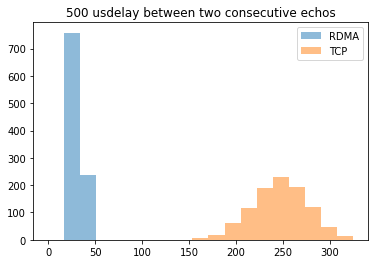

In [33]:
hist_data(res_usleep, '500 usdelay between two consecutive echos', 20)

4225.333333333333


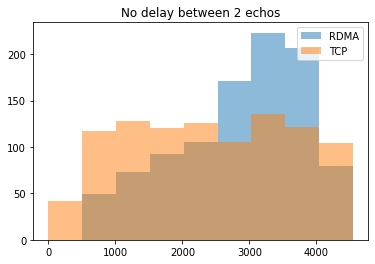

In [31]:
hist_data(res_no_usleep, "No delay between 2 echos") # hard to interpret (4000 us), more experiments, consider different range of delay between 2 echos

158.0


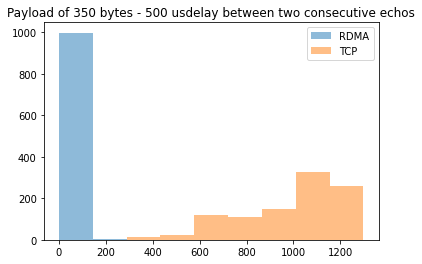

In [34]:
hist_data(res_usleep_350, 'Payload of 350 bytes - 500 usdelay between two consecutive echos')

269.6666666666667


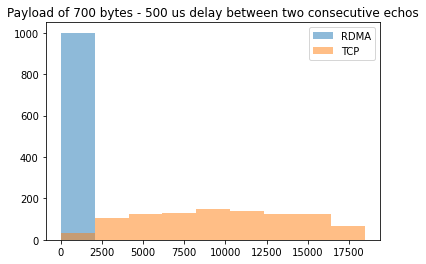

In [58]:
hist_data(res_usleep_700, 'Payload of 700 bytes - 500 us delay between two consecutive echos')

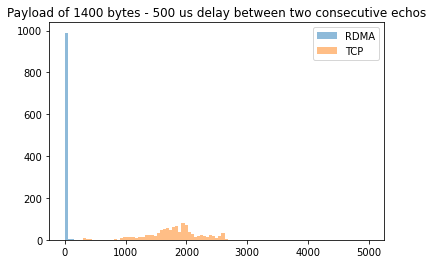

In [57]:
hist_data(res_usleep_1400, 'Payload of 1400 bytes - 500 us delay between two consecutive echos', 100, 5000)

### Different lengths

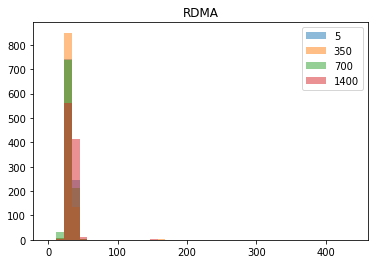

In [50]:
payload_data(res_usleep['rdma'] , res_usleep_350['rdma'], res_usleep_700['rdma'], res_usleep_1400['rdma'], 'RDMA',40)

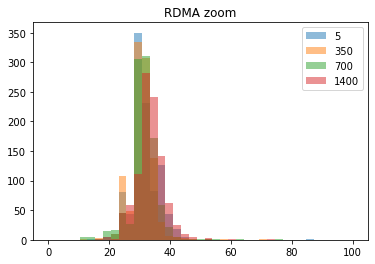

In [56]:
payload_data(res_usleep['rdma'], res_usleep_350['rdma'], res_usleep_700['rdma'], res_usleep_1400['rdma'], 'RDMA zoom', 40, 100)

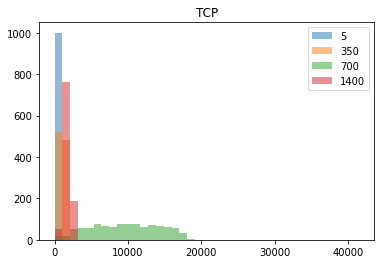

In [52]:
payload_data(res_usleep['tcp'] , res_usleep_350['tcp'], res_usleep_700['tcp'], res_usleep_1400['tcp'], 'TCP',40)

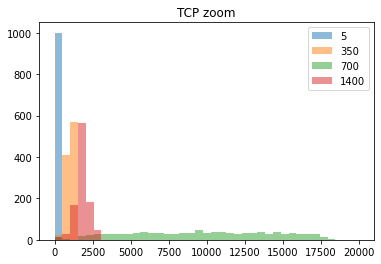

In [55]:
payload_data(res_usleep['tcp'] , res_usleep_350['tcp'], res_usleep_700['tcp'], res_usleep_1400['tcp'], 'TCP zoom',40, 20000)

### Over time

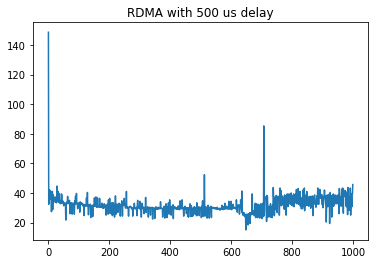

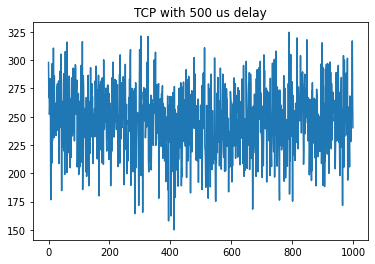

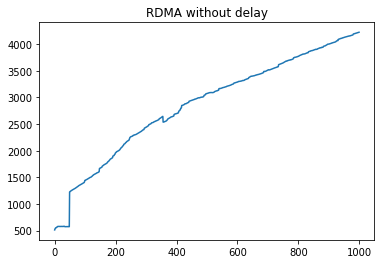

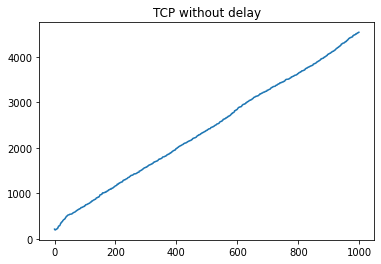

In [68]:
over_time(res_usleep['rdma'], 'RDMA with 500 us delay')
over_time(res_usleep['tcp'],  'TCP with 500 us delay')

# check with more data
over_time(res_no_usleep['rdma'], 'RDMA without delay')
over_time(res_no_usleep['tcp'],  'TCP without delay') 